# Lesson 08: pandas I

최규빈  
2023-07-24

<a href="https://colab.research.google.com/github/guebin/PP2024WIN/blob/main/posts/Day2/ls08.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# imports

In [1]:
import pandas as pd

# 예비학습

## lambda

`-` 예제1: 람다표현식(lambda expression)자체가 하나의 오브젝트임

In [9]:
lambda x: (x-2)**2 ### lambda x: (x-2)**2 가 실행되는 순간 메모리상에 함수 오브젝트가 저장됨 

**(사용방법)**

In [128]:
(lambda x: (x-2)**2)(2) # 입력2 -> 출력 (2-2)^2 =0 

In [129]:
(lambda x: (x-2)**2)(5) # 입력5 -> 출력 (5-2)^2 =9

In [130]:
(lambda x: (x-2)**2)(6) # 입력6 -> 출력 (6-2)^2 =16

In [131]:
(lambda x: (x-2)**2)(-2) # 입력-2 -> 출력 (-2-2)^2 =16

**quiz**

$f(x)=\sqrt{x}$ 를 수행하는 함수를 lambda를 이용하여 구성하라.

In [136]:
(lambda x: np.sqrt(x))(2)

`-` 예제2: 람다표현식에 이름을 줄 수 있음.

In [137]:
f = lambda x: (x-2)**2

In [138]:
f(2),f(4),f(6),f(-2)

위의 코드는 아래와 같다.

In [139]:
def f(x):
    return (x-2)**2
f(2),f(4),f(6),f(-2)

`-` 예제3: 조건부 출력

In [21]:
f = lambda x,y: x if x>y else y # x,y가 입력 -> x>y 일때만 x를 리턴하고 그렇지않으면 y를 리턴 = 큰값을 리턴하라는 소리임 

In [22]:
f(1,20)

**quiz**

임의의 알파벳 문자열을 입력으로 하고, 알파벳이 대문자이면 “대문자
입니다”를 리턴하고 소문자이면 “소문자 입니다”를 리턴하는 함수를
구성하라.

(힌트) 아래코드 이용

In [25]:
(lambda x: "대문자" if x.isupper() else "소문자")('A')

`-` 예제4: 람다표현식들의 리스트

In [33]:
fl = [lambda x: x, lambda x: x**2, lambda x: x**3]

In [34]:
for f in fl: 
    print(f(2))

2
4
8

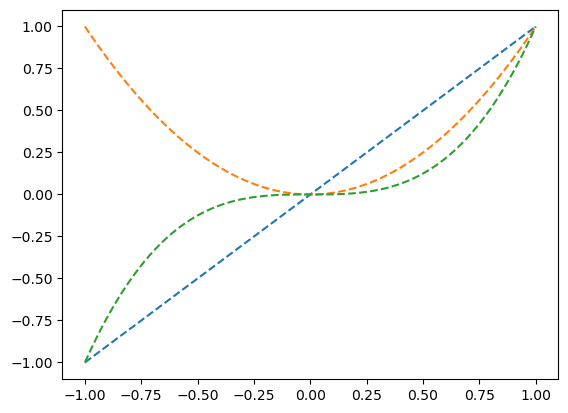

In [43]:
x = np.linspace(-1,1,100)
for f in fl:
    plt.plot(x,f(x),'--') 

`-` 예제5: 람다표현식들의 딕셔너리

In [50]:
fd = {'f1':lambda x: x, 'f2':lambda x: x**2, 'f3':lambda x: x**3}
fd

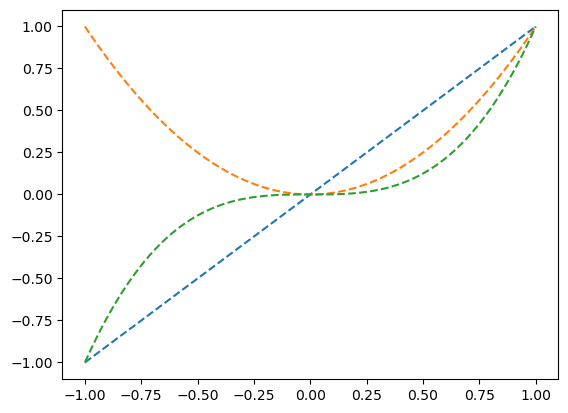

In [51]:
for k in fd:
    plt.plot(x,fd[k](x),'--')

`-` 예제6: 람다표현식을 리턴하는 함수 (함수를 리턴하는 함수)

(예비학습) 함수 $g(x)$가 정의되어 있을때 $\frac{d}{dx}g(x)$의 값을
계산해보기

In [52]:
g = lambda x: x**2 

$g(x)=x^2$

$$g'(x)=gg(x)=2x\approx \frac{g(x+0.001)-g(x)}{0.001}$$

In [209]:
gg = lambda x : (g(x+0.001)-g(x))/0.001

In [210]:
gg(4)

(목표) 도함수를 구해주는 `derivate` 함수를 정의하자. 이 함수는 임의의
함수 g를 입력으로 받으면, g의 도함수(gg)가 리턴되는 기능을 가진다.

In [71]:
derivate = lambda g: (lambda x : (g(x+0.001)-g(x))/0.001)

(사용1)

In [86]:
x = np.linspace(0,6.28,1000) 

In [87]:
g = lambda x: np.sin(x)

In [88]:
gg = derivate(g) 

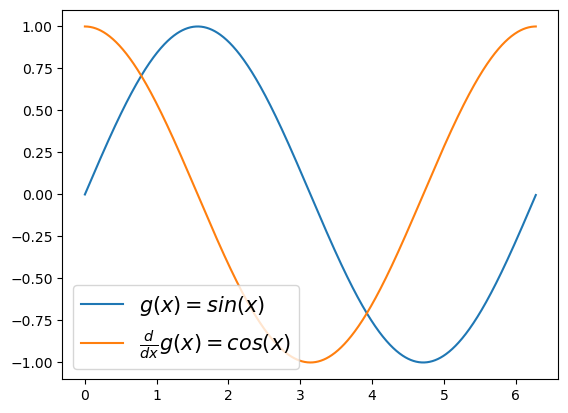

In [89]:
plt.plot(x,g(x),label=r'$g(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}g(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [90]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

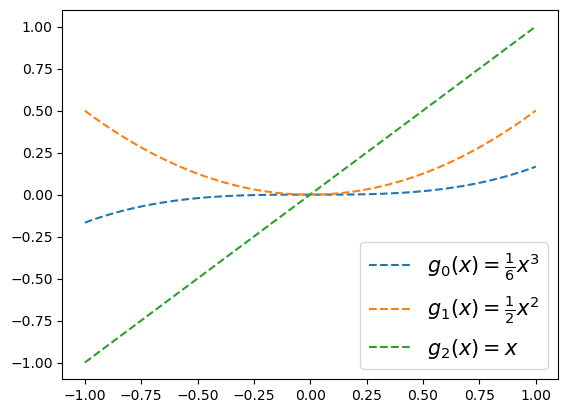

In [91]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

`-` 예제7: 예제6의 다른표현

In [237]:
derivate = lambda g: lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [238]:
g = lambda x: np.sin(x) 

In [239]:
gg = derivate(g) 

In [240]:
x = np.linspace(0,6.28,1000) 

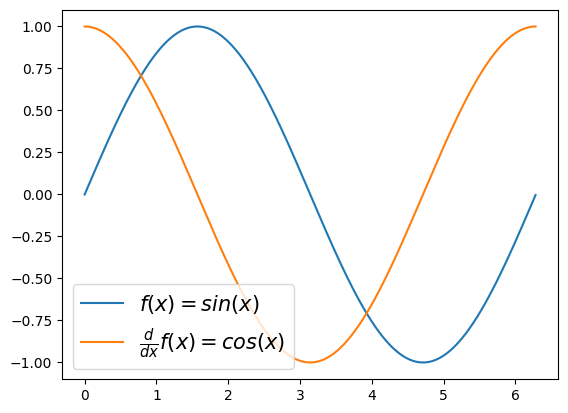

In [241]:
plt.plot(x,g(x),label=r'$f(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}f(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [235]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

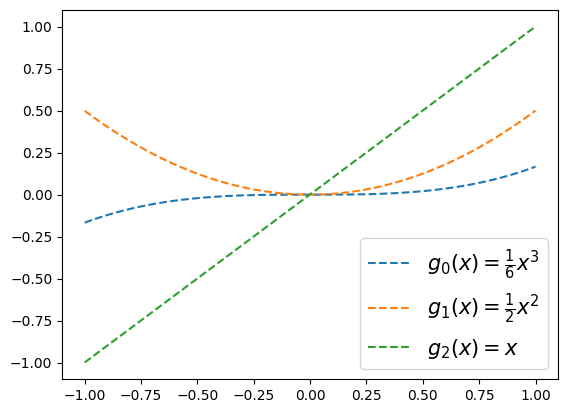

In [236]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

## map

`-` 개념: \$(f,\[x_1,x_2,,x_n\] )=\$

`-` 예제1:

In [98]:
x = [1,2,3] 
f = lambda x: x+1
y = list(map(f,x))
x,y

**quiz**

$x=[1,2,3,4,5]$에 대하여 $x^2$을 수행하는 함수를 구현하라.

In [100]:
list(map(lambda x: x**2 ,[1,2,3,4,5]))

`-` 예제2: 문자열을 입력으로 받고 대문자이면 True, 소문자이면 False

    입력: A,B,C,a,b,c
    출력: T,T,T,F,F,F

In [102]:
list(map(lambda x: x.isupper(), ['A','B','C','a','b','c']))

`-` 예제3: 두개의 입력을 받는 함수 (map을 이용하는 것이 리스트
컴프리헨션보다 조금 편한것 같다)

In [105]:
f= lambda x,y: x+y 
x=[1,2,3]
y=[-1,-2,-3]

In [106]:
list(map(f,x,y))

**quiz**

In [107]:
t=np.linspace(-3.14,3.14,100)
x=np.sin(t)
y=np.cos(t)

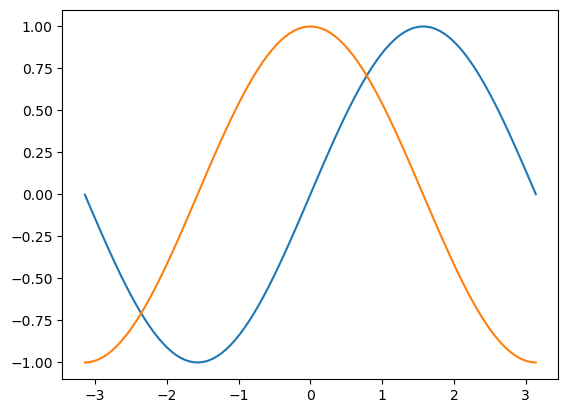

In [108]:
plt.plot(t,x)
plt.plot(t,y)

$f(x,y) = \max(x,y)$ 를 구현하여 ${\bf x}$,${\bf y}$ 각 원소에 적용하고
결과를 시각화 하라.

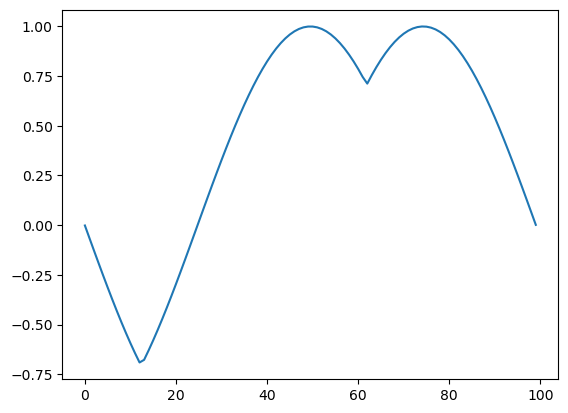

In [117]:
plt.plot(list(map(lambda x,y: max(x,y), x,y)))

`-` 종합: map과 리스트컴프리헨션과 비교

-   map은 for문을 위한 $i$등의 인덱스를 쓰지 않지만 리스트컴프리헨션은
    필요함
-   map은 좀 더 리스트컴프리헨션보다 제약적으로 사용할 수 밖에 없음.

# Pandas: transform column

## `lambda`

`-` 예시1: $x \to x+2$

In [118]:
f = lambda x: x+2
f(1)

`-` 예시2: $x,y \to x+y$

In [119]:
f = lambda x,y: x+y
f(1,2)

`-` 예시3: ‘2023-09’ $\to$ 9

In [76]:
f = lambda x: int(x[-2:])
f('2023-09')

`-` 예시4: ‘2023-09’ $\to$ (2023,9)

In [130]:
f = lambda x: (int(x[:4]),int(x[-2:]))
f('2023-09')

`-` 예시5: 문자열이 ‘cat’이면 1 ’dog’ 이면 0 // ’cat이면 1 ’cat’이
아니면 0

In [131]:
f = lambda x: 1 if x=='cat' else 0

In [132]:
f('cat'), f('dog')

`-` Note: `f`로 이름을 정하지 않고 직접 사용 가능

In [133]:
(lambda x: x+1)(2)

## `map`

`-` 개념: `map(f,[x1,x2,...xn])=[f(x1),f(x2),...,f(xn)]`

`-` 예시1: `x->x+1`을 `[1,2,3]`에 적용

In [134]:
list(map(lambda x: x+1, [1,-5,3]))

`-` 예시2 `df.Height`열 변환하기

In [185]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv').drop(['Loaned From','Best Overall Rating'],axis=1).dropna()
s = df.Height[:5]
s

In [83]:
x = s[0]
x

In [84]:
list(map(lambda x: int(x.replace('cm','')), s))

`# 예시3` `df.Height`열 변환하기 + 변환된 열 할당하기

In [167]:
df.assign(
    Height = list(map(lambda x: int(x.replace('cm','')), df.Height)),
    Weight = list(map(lambda x: int(x.replace('kg','')), df.Weight)),
)

`#`

`# 예시4` – `df.Position` 열에 아래와 같은 변환을 수행하고, 변환된 열을
할당하라.

|            before             | after |
|:-----------------------------:|:-----:|
| `<span class="pos pos28">SUB` | `SUB` |
| `<span class="pos pos15">LCM` | `LCM` |
|  `<span class="pos pos7">LB`  | `LB`  |
| `<span class="pos pos13">RCM` | `RCM` |
| `<span class="pos pos13">RCM` | `RCM` |

In [187]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv').drop(['Loaned From','Best Overall Rating'],axis=1).dropna()
df

In [193]:
df['Position'] = [l.split('>')[-1] for l in df.Position]
df

## `s.apply(변환함수)`

`-` 예시1: 원소별로 처음3개의 숫자만 출력

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')

In [3]:
df.Height.apply(lambda x: int(x.replace('cm',''))) 

`-` 예시2: 원소별로 처음3개의 문자만 출력 $\to$ `str`자료형을
`int`자료형으로 변환

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')

(방법1) – 한번에

In [7]:
df.Height.apply(lambda x: int(x[:3]))

(방법2) – 연쇄적으로..

In [9]:
df.Height.apply(lambda x: x[:3]).apply(int)